# **NLP03 Advanced Text Representation - Word2Vec**

## **Vector Embeddings:**

In Natural language processing, vector embedding is the term used for the representation of words for text analysis, typically in the form of real valued vectors that encodes the meaning of the words such the words that are closer in the vector space are considered to have the similar meaning.

------------------------------------------------------------------------------

## **Word2Vec Embedding model:**
The Word2Vec is a vector embedding algorithm which converts textual words into a series of vectors such that their semantic meaning is captured.

It was first introduced by Google in 2013.

### Advantages of Word2Vec over older models:
1. It captures the semantic meaning of data
2. It produces vectors of much lower dimentions leading to efficient processing
3. It produces dense vectors.
4. It is based on Neural network based Deep learning architectures.

Word2Vec can be performed either by training your own embedding model using some training data or using existing pretrained models.


-------------------------------------------------------------------------

### **Intuition**
In order to represent the words in the form of vectors, the W2V algorithm creates certain features on the basis of which numbers are assigned.

ex: Let us take the following words: king, queen, man, women and monkey

Let us consider features as gender, wealth, power, weight and speak.
(Right now, the features are arbitrality considered)

Using the above features, the vocabulary can be represented as vectors as following:

| Word   | Gender | Wealth | Power | Weight | Speak |
| ------ | ------ | ------ | ----- | ------ | ----- |
| king   | +1     | 9      | 10    | 8      | 1     |
| queen  | –1     | 9      | 9     | 6      | 1     |
| man    | +1     | 4      | 5     | 6      | 1     |
| woman  | –1     | 4      | 4     | 5      | 1     |
| monkey | 0      | 1      | 1     | 4      | 0     |

You can find that the words are given a score from (0-10) against each feature to get the numerical representation. For gender, +1 represents male and -1 represents female while 0 represents None. Similarly for the speak feature 1 represents yes while 0 represents No.

The final embeddings are obtained as follows:

v_king   = [1, 9, 10, 8, 1] <br>
v_queen  = [-1, 9, 9, 6, 1] <br>
v_man    = [1, 4, 5, 6, 1] <br>
v_woman  = [-1, 4, 4, 5, 1] <br>
v_monkey = [0, 1, 1, 4, 0] <br>


Various vector operations can thus be performed on these embeddings to get various words, thus highlighting the semantic relationship between the words.

ex: Let us perform the following operation:

king - man + woman


This logically has to give us the answer as Queen

In [1]:
import numpy as np

# Define vectors
v_king   = np.array([1, 9, 10, 8, 1])
v_man    = np.array([1, 4, 5, 6, 1])
v_woman  = np.array([-1, 4, 4, 5, 1])
v_queen  = np.array([-1, 9, 9, 6, 1])

# Analogy computation
result = v_king - v_man + v_woman

result


array([-1,  9,  9,  7,  1])

You can find that we indeed obtained an array that is exactly similar to queen.

This is the power of word2Vec, where the semantic relationships between the words are perfectly captured.

------------------------------------------------------------------------------
There are two most popular word2Vec algorithms. They are:
1. CBOW
2. Skip-gram

----------------------------------------------------------------------------

## **Continuous Bag of Words (CBOW)**

Consider the problem": <br>
Given a series of contextual words, we need to predict the target word.

Let us consider the following example: <br>

             "She sells sea shells on the shore"

Let is consider the word 'sea' as the target word. Then the words sorrounding it, ie: "sells" and "shells" are the contextual words.

Now let is consider the table below:

| X1 | X2 | y |
|----|----|---|
| she| sea| sells|
| sea| on | shells|
sells| shells | sea
shells| the | on

From the above dataset of various contexual words and their target word, we can build a supervised learning model which can predict the target word for any given set of contextual words.

We first convert each of the independent feature into a one hot encoded vector. The vectors thus formed would be of size 7 (corresponding to 7 words)

Inorder to do the prediction, we can build an artificial neural network system as follows. This would be a full connected feed forward neural network.



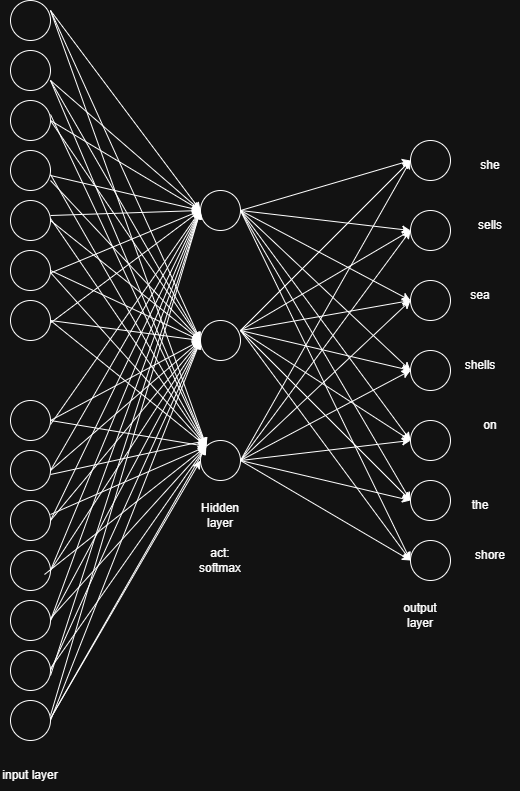

Let us consider that we want a 3 dimentional embeddings, we then take a hidden layer of 3 neurons.

If you want a n dimentional embedding, you need to take n neurons in the hidden layer.

This neural network is then trained according the standard deep Learning principles (feed forwarding and backpropogation of error across multiple epochs). The trained network with the finalized weights are obtained.

We know that every neuron in the output layer corresponds to a unique word in the vocabulary (revisit one hot encoding).

The embedding of a certain word in the vocabulary is given by the vector of all the weights coming from the hidden layer to the output neuron corresponding to that perticular word.

### **Skip-Gram Architecture**

The skip-gram is just the inverse of the CBOW architecture. Here instead of predicting the target given the contexts. You predict the contexts given the target.

The neural network in this has 7 neurons in the input layer, 3 in the hidden layer and 14 (7 each) neurons in the output layer.

**Note:** The number of neurons mentioned are according to the above provided example. Real numbers may vary and are solely dependent on the problem you are solving.

CBOW is faster and is more accurate for shorter datasets wheras skip-gram works well for big datasets.

## **Training your own Word2Vec model using the Gensim Liberary**

We are going to train our own Word2Vec model on the corpus of 5 novels of the popular "**A Song of Ice and Fire"** novel series by GRR Martin. This novel series was popularized by the TV show **Game of Thrones**.

The dataset is taken from kaggle: <br>
https://www.kaggle.com/datasets/aniketdvd/game-of-thrones-books

We are going to use this dataset to train our Deep Learning model using gensim liberary.

In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 69.8 MB/s eta 0:00:00


In [3]:
import gensim
import os

In [5]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [8]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

The data in each book is fetched, sentense tokenized and basic preprocessing is applied. It is then appended to the ``story`` list.

In [11]:
story = []

data_path = 'data'

for filename in os.listdir(data_path):
    filepath = os.path.join(data_path, filename)

    # skip directories
    if os.path.isdir(filepath):
        continue

    # open with fallback for bad characters
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as f:
        corpus = f.read()

    raw_sent = sent_tokenize(corpus)

    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [16]:
story

[['game',
  'of',
  'thrones',
  'book',
  'one',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'by',
  'george',
  'martin',
  'prologue',
  'we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are', 'dead'],
 ['do', 'the', 'dead', 'frighten', 'you'],
 ['ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead'],
 ['royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',


In [17]:
len(story)

158875

then create the word2vec model using the ``gensim.models.word2vec`` method.

In [19]:
model = gensim.models.Word2Vec(
    window=10,  # the window denotes the size the context at each side of the target word
    min_count=2, # we only take those sentences that have atleast 2 words.
    workers=4, # denotes how many parallel cores are to be assigned to process the data> this is required since we are working with big data
)

In [20]:
model.build_vocab(story)

In [21]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6576429, 8625240)

In [23]:
model.wv.most_similar('stark')

[('arryn', 0.7812668085098267),
 ('winterfell', 0.773827075958252),
 ('brandon', 0.7500585317611694),
 ('robb', 0.7147009968757629),
 ('tully', 0.7116032242774963),
 ('murdered', 0.7018316388130188),
 ('benjen', 0.6943163871765137),
 ('eddard', 0.6817293167114258),
 ('bastard', 0.6701890826225281),
 ('widow', 0.669287383556366)]

As you can see, we fetched the most similar words corresponding to the word 'stark'

In [24]:
model.wv.most_similar('baratheon')

[('rebellion', 0.8262136578559875),
 ('conqueror', 0.782802164554596),
 ('dragonstone', 0.7753065824508667),
 ('rightful', 0.7742913961410522),
 ('harlen', 0.7651554942131042),
 ('daeron', 0.7605076432228088),
 ('aegon', 0.7577359080314636),
 ('council', 0.7526002526283264),
 ('warden', 0.7453526258468628),
 ('ii', 0.7439171671867371)]

In [28]:
model.wv.doesnt_match(['jon','tywin','robb','arya','sansa','bran'])

'tywin'

**fun fact to understand the output:** Tywin belonged to house Lannister wheras all the others are the children of House Stark. Hence Tywin Lannister is the one that doesnt match

In [29]:
model.wv.doesnt_match(['cersei', 'jaime', 'bronn', 'tyrion'])

'bronn'

cersei, jaime and tyrion are all the children of house Lannister while bronn was a sellsword turned knight

In [30]:
model.wv['king']  # vector representation of a perticular word

array([ 2.3225806 ,  0.7395389 ,  0.9301805 , -2.9318137 , -0.7225663 ,
        3.526587  ,  0.6286922 ,  0.62509656,  0.772789  ,  0.28464958,
        0.10128139,  2.0305128 , -1.8083165 , -0.6275319 , -2.1941614 ,
       -1.3136098 ,  1.544413  , -0.51935977, -3.826363  , -2.437082  ,
        3.3335073 ,  3.4380739 , -1.2421919 , -3.6562524 ,  0.51303744,
       -0.4951814 , -0.6205993 ,  0.43905312, -0.7253593 ,  2.6940207 ,
       -2.226183  ,  2.030548  , -1.6278001 , -2.0864599 ,  3.2120166 ,
        0.51526535,  1.4738771 , -2.156285  , -1.354452  ,  0.04293636,
       -1.3211384 ,  0.13477236,  0.59690785,  1.2683433 , -0.20677163,
       -1.8802989 ,  0.8386111 ,  0.9499664 ,  1.3636247 ,  0.23763901,
        0.41284692,  1.4249985 ,  1.2291278 , -0.6879275 , -1.606422  ,
        0.04941618, -0.74187255,  0.40204212, -0.7470385 ,  0.71891505,
        1.9349933 , -0.88099885, -0.8647512 ,  1.9619492 ,  0.8454188 ,
        0.55828846,  0.58772135,  1.2903663 , -1.7781261 ,  0.61

In [31]:
model.wv.similarity('arya','sansa')

np.float32(0.85119915)

The similarity is high because both arya and sansa are sisters

In [32]:
model.wv.similarity('tywin','sansa')

np.float32(0.24236602)

It has low similarity because tywin and sansa are two unrelated characters

We can find how effectively word2vec captures the semantic meaning and the semantic relationships between the data

In [38]:
y = model.wv.index_to_key

In [39]:
y

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'them',
 'lord',
 'no',
 'from',
 'were',
 'would',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'could',
 'are',
 'we',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'king',
 'who',
 'well',
 'down',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'old',
 'hand',
 'even',
 'too',
 'before',
 'never',
 'tyrion',
 'off',
 'an',
 'know',
 'see',
 'into',
 'made',
 'father',
 'now',
 'eyes',
 'black',
 'told',
 'thought',
 'lady',
 'time',
 'then',
 'how',
 'long',
 'has',
 'might',
 'us',
 'come',
 'where',
 'here',
 'can',
 'through',
 'still',
 'face',
 'head',
 'red',
 'way',
 'page',
 'boy',
 'must',
 'once',
 'good',
 'two',
 'over',
 'little',
 'about',
 'brother'

In [33]:
from sklearn.decomposition import PCA

In [34]:

pca = PCA(n_components=3)

In [35]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [36]:
X.shape

(17869, 3)

In [40]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()